# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
#import appropriate libraries

In [4]:
df_merge = pd.read_csv(r'C:\Users\boudl\Firearm Education Project\02 Data\Prepared Data\firearmcensus_merge.csv')
#import firearms and census dataset

# Data Study

## General Analysis

THis study in Python will determine if there is a relationship of deaths to total population by determining if suicide deaths are higher than homicide deaths. 

In [5]:
df_merge.columns
#display column names in dataset

Index(['Unnamed: 0', 'State', 'F Year', 'f Gender', 'ICD-10 113 Cause List',
       'F Under 5 years', 'F 5-9 years', 'F 10-14 years', 'F 15-19 years',
       'F 20-24 years', 'F 25-29 years', 'F 30-34 years', 'F 35-39 years',
       'F 40-44 years', 'F 45-49 years', 'F 50-54 years', 'F 55-59 years',
       'F 60-64 years', 'F 65-69 years', 'F 70-74 years', 'F 75-79 years',
       'F 80-84 years', 'F 85years and older', 'F Not Stated', 'C Year',
       'C Total population', 'C Male Total population',
       'C Female Total population', 'C Under 5 years', 'C 5 to 9 years',
       'C 10 to 14 years', 'C 15 to 19 years', 'C 20 to 24 years',
       'C 25 to 29 years', 'C 30 to 34 years', 'C 35 to 39 years',
       'C 40 to 44 years', 'C 45 to 49 years', 'C 50 to 54 years',
       'C 55 to 59 years', 'C 60 to 64 years', 'C 65 to 69 years',
       'C 70 to 74 years', 'C 75 to 79 years', 'C 80 to 84 years',
       'C 85 years and over', 'Total Deaths'],
      dtype='object')

In [12]:
death_count_columns = ['F Under 5 years', 'F 5-9 years', 'F 10-14 years', 'F 15-19 years',
                       'F 20-24 years', 'F 25-29 years', 'F 30-34 years', 'F 35-39 years',
                       'F 40-44 years', 'F 45-49 years', 'F 50-54 years', 'F 55-59 years',
                       'F 60-64 years', 'F 65-69 years', 'F 70-74 years', 'F 75-79 years',
                       'F 80-84 years', 'F 85years and older', 'F Not Stated']
#create death counts column

In [15]:
df_2017 = df_merge[df_merge['F Year'] == 2017]
#filter data for 2017

In [16]:
total_homicides_2017 = df_2017[df_2017['ICD-10 113 Cause List'] == 'Homicide'][death_count_columns].sum(axis=1)
total_suicides_2017 = df_2017[df_2017['ICD-10 113 Cause List'] == 'Suicide'][death_count_columns].sum(axis=1)
#calculate total homicides and suicides

In [17]:
df_homicides_2017 = pd.DataFrame({'Total Deaths': total_homicides_2017, 'Total Population': df_2017['C Total population'], 'Type': 'Homicide'})
df_suicides_2017 = pd.DataFrame({'Total Deaths': total_suicides_2017, 'Total Population': df_2017['C Total population'], 'Type': 'Suicide'})
#create dataframes for homicide and suicide deaths

In [18]:
combined_data_2017 = pd.concat([df_homicides_2017, df_suicides_2017])
#combine dataframes

C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

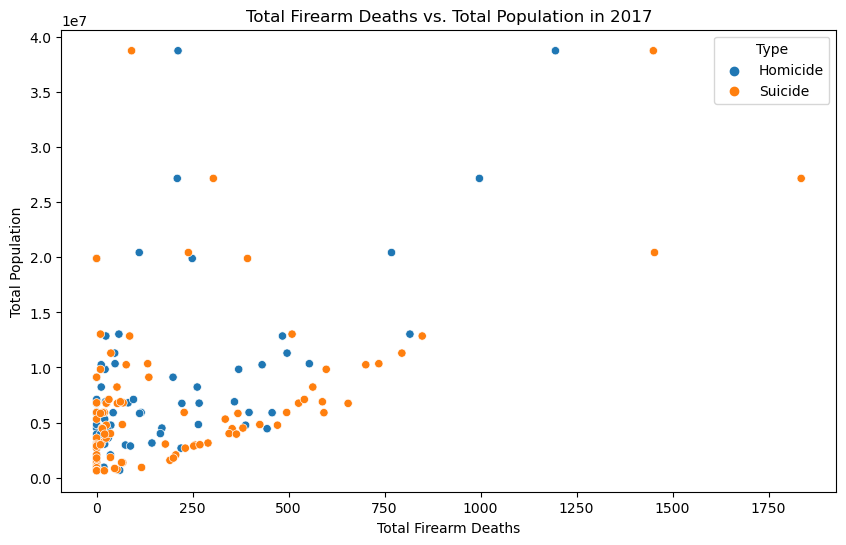

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Deaths', y='Total Population', hue='Type', data=combined_data_2017)
plt.title('Total Firearm Deaths vs. Total Population in 2017')
plt.xlabel('Total Firearm Deaths')
plt.ylabel('Total Population')
plt.show()
#create scatterplot

## Regression and Prediction Modeling

In [76]:
df_suicide = df_merge[df_merge['ICD-10 113 Cause List'] == 'Suicide'].copy()
df_homicide = df_merge[df_merge['ICD-10 113 Cause List'] == 'Homicide'].copy()
df_suicide['DeathType'] = 'Suicide'
df_homicide['DeathType'] = 'Homicide'
#create dataframe copy

In [77]:
df_suicide['DeathType'] = 'Suicide'
df_homicide['DeathType'] = 'Homicide'
combined_df = pd.concat([df_suicide, df_homicide])
#merege data to one dataframe

In [78]:
combined_df['TotalDeaths'] = combined_df[death_count_columns].sum(axis=1)
#sumarize total deaths for each type

In [79]:
X = combined_df['C Total population'].values.reshape(-1, 1)
y = combined_df['TotalDeaths'].values.reshape(-1, 1)
#define indep and dep variables

In [83]:
x_train, x_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, combined_df.index, test_size=0.3, random_state=0)
#split data to test and training sets

In [84]:
regression = LinearRegression()
regression.fit(x_train, y_train)
#create and train regression model

LinearRegression()

In [85]:
y_pred = regression.predict(x_test)
#create predicitons

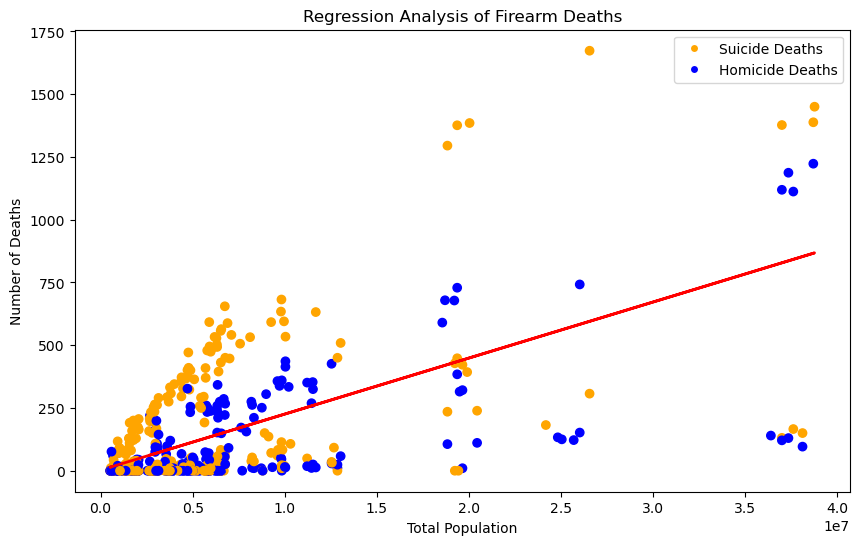

In [91]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_test, y_test, c=combined_df.loc[indices_test, 'DeathType'].map({'Suicide': 'orange', 'Homicide': 'blue'}))
plt.plot(x_test, y_pred, color='red', linewidth=2)
legend_labels = {'Suicide': 'Suicide Deaths', 'Homicide': 'Homicide Deaths'}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color) for label, color in zip(legend_labels.values(), ['orange', 'blue'])]
plt.title('Regression Analysis of Firearm Deaths')
plt.xlabel('Total Population')
plt.ylabel('Number of Deaths')
plt.legend(handles=handles)
plt.show()
#plot prediction model

In [95]:
print("MSE:", mse)
print("R2 Score:", r2)
#calculate mse and r2 values

MSE: 36344.522872813955
R2 Score: 0.34224478388515667


The large cluster of dots closer to zero indicate that the lower a population, the lower number of reported deaths whereas the opposite is true - a larger population will show a larger number of deaths as indicated by the dots farther and higher on the chart. However, this chart does show that regardless of population size, there will almost always be more suicide deaths than homicide deaths. There are a few outliers in both homicide and suicide deaths that need to be investigated further. The regression line will confirm that as a population size increases, the number of suicide deaths [by firearm] will also increase.
The MSE value is quite large, indicating that there is not that accurate in predicting how manty deaths [by suicide or homicide] in a total population. The R2 value is also low, but not as low as expected, giving approximatley 0.342 of unexplained variance in the data.

In [96]:
comparison_df = pd.DataFrame({'Actual_Deaths': y_test.flatten(), 'Predicted_Deaths': y_pred.flatten()})
print(comparison_df)
#create dataframe to compare actual to predicted values

     Actual_Deaths  Predicted_Deaths
0              197         62.420787
1              655        152.973757
2              110         37.525460
3                0         31.825700
4               10        188.261667
..             ...               ...
546              0        198.769683
547              0        107.683142
548              0         25.938515
549             37        188.261667
550             76         15.596986

[551 rows x 2 columns]


There are significant differences in the actual reported deaths and the predicted deaths, suggesting several different things. It was mentioned at the beggining of the project that there might be outliers in the data in the extreme or minor (meaning there was more reported in one age group or state or year, or there were none reported because the CDC does not record counts less than 9). The model itself could have issues that need evaluation to determine if the variables do in fact have a relationship, or if the data needs further refinement to better display and model the variables.